In [6]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib.colors import Normalize
import cartopy.crs as ccrs
import cartopy
from matplotlib.cm import get_cmap, ScalarMappable

In [7]:
proj=ccrs.PlateCarree(central_longitude=180)
proj0=ccrs.PlateCarree(0)

seas='JJA'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_clim.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
print(ncin)
print(ncin.variables.keys())
print(ncin.variables['chi'])
print(ncin.variables['tp'])
chi=ncin.variables['chi'][:]
psi=ncin.variables['psi'][:]
u=ncin.variables['u'][:]
v=ncin.variables['v'][:]
tp=ncin.variables['tp'][:]
temp0=ncin.variables['temp0'][:]
omega=ncin.variables['omega'][:]
lon=ncin.variables['lon'][:]
lat=ncin.variables['lat'][:]
lev=ncin.variables['lev'][:]
ncin.close()


#South America
las,lan=-25,-5
low,loe=290,320
#Europe
low,loe=0,40
las,lan=55,75
#Central America
low,loe=240,270
las,lan=20,40
fplot1=np.mean(temp0,axis=0)[:,:]
fplot2=np.mean(tp,axis=0)[:,:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Wed Dec 01 12:09:43 2021: cdo -O merge subset_JJAmean_clim.nc JJA_members_param_clim.nc JJAmean_clim.nc
Wed Dec 01 12:09:32 2021: cdo -O merge twoD.nc threeD.nc subset_JJAmean_clim.nc
Wed Dec 01 12:09:32 2021: cdo -O selvar,mslp,u0,v0,temp0,sst,tp,evap,olr,ssr,tsr,slr,shf JJA_members_clim.nc twoD.nc
Wed Dec  1 12:09:23 2021: ncap2 -O -s tp=precls + precnv JJA_members_clim.nc JJA_members_clim.nc
Wed Dec 01 12:09:07 2021: cdo seasmean -selmon,6,7,8 -seltimestep,11/2399 exp_000.nc JJA_members_clim.nc
Fri Nov 19 09:21:01 2021: cdo -f nc import_binary /home/PERSONALE/emanuele.dicarlo3/exp_000/attm000.ctl exp_000.nc
    NCO: 4.7.2
    nco_openmp_thread_number: 1
    CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(199), bnds(2), lon(96), l

In [8]:
chi850_mean = chi[:,2,:,:].mean(axis=0)
chi200_mean = chi[:,4,:,:].mean(axis=0)

u850_mean = u[:,2,:,:].mean(axis=0)
u200_mean = u[:,4,:,:].mean(axis=0)

v850_mean = v[:,2,:,:].mean(axis=0)
v200_mean = v[:,4,:,:].mean(axis=0)

(-179.99999999999932, 176.25000000000063)

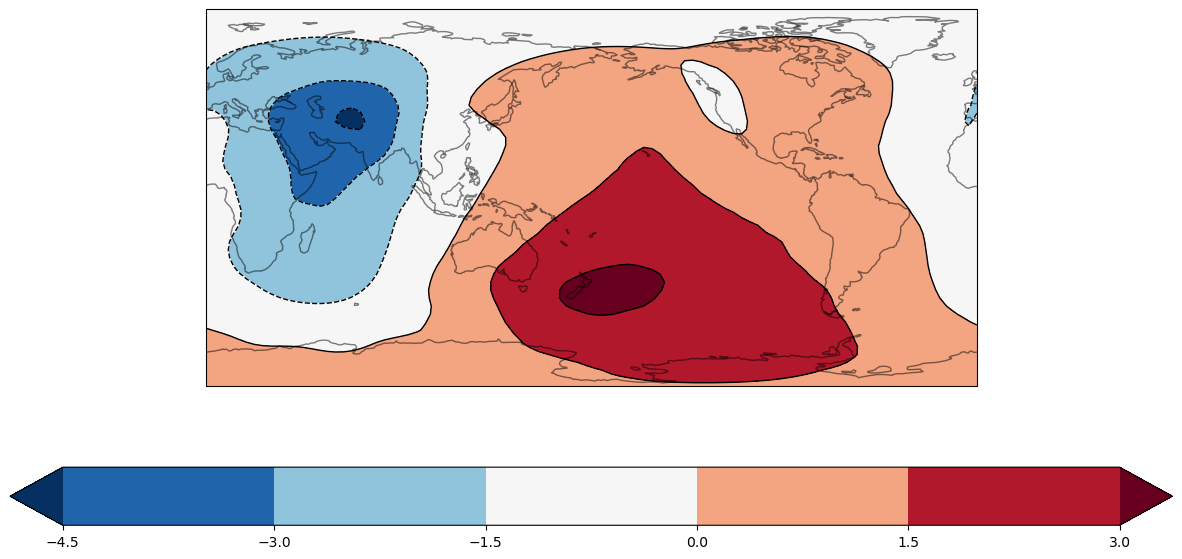

In [9]:
fig, ax = plt.subplots(subplot_kw = dict(projection = proj), figsize = [15,7])

ax.contour(lon,lat,chi200_mean,colors='k',transform=proj0,linewidths=1, extend="both")
c=ax.contourf(lon,lat,chi200_mean,cmap='RdBu_r',transform=proj0, extend="both",)
#ax.contour(lon,lat,fplot2,colors='k',transform=proj0,levels=np.linspace(-150,150,15))
ax.coastlines(color='black', alpha = 0.5)
#ax.quiver(lon[::5], lat[::5], u850[::5,::5], v850[::5,::5], transform = proj0)
fig.colorbar(c,ax=ax,orientation='horizontal')
#x=[low,loe,loe,low,low]
#y=[las,las,lan,lan,las]
#ax.plot(x,y,transform=proj0,color='red')
ax.set_xlim()
#ax.set_title('T2m (temp0, K, contours) and TP (mm/day) DJF climatology ')
#fig.savefig(seas+'_surface_ut.png',dpi=300)
#plt.show()

In [10]:
seas='DJF'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_nino.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
print(ncin)
print(ncin.variables.keys())
print(ncin.variables['chi'])
print(ncin.variables['tp'])
chi=ncin.variables['chi'][:]
psi=ncin.variables['psi'][:]
u=ncin.variables['u'][:]
v=ncin.variables['v'][:]
tp=ncin.variables['tp'][:]
temp0=ncin.variables['temp0'][:]
omega=ncin.variables['omega'][:]
lon=ncin.variables['lon'][:]
lat=ncin.variables['lat'][:]
lev=ncin.variables['lev'][:]
ncin.close()


#South America
las,lan=-25,-5
low,loe=290,320
#Europe
low,loe=0,40
las,lan=55,75
#Central America
low,loe=240,270
las,lan=20,40
fplot1=np.mean(temp0,axis=0)[:,:]
fplot2=np.mean(tp,axis=0)[:,:]

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Wed Dec 01 12:09:04 2021: cdo -O merge subset_DJFmean_nino.nc DJF_members_param_nino.nc DJFmean_nino.nc
Wed Dec 01 12:08:54 2021: cdo -O merge twoD.nc threeD.nc subset_DJFmean_nino.nc
Wed Dec 01 12:08:52 2021: cdo -O selvar,mslp,u0,v0,temp0,sst,tp,evap,olr,ssr,tsr,slr,shf DJF_members_nino.nc twoD.nc
Wed Dec  1 12:08:44 2021: ncap2 -O -s tp=precls + precnv DJF_members_nino.nc DJF_members_nino.nc
Wed Dec 01 12:08:25 2021: cdo seasmean -selmon,12,1,2 -seltimestep,11/2399 exp_070.nc DJF_members_nino.nc
Tue Nov 23 11:50:04 2021: cdo -f nc -import_binary /home/PERSONALE/emanuele.dicarlo3/exp_070/attm070.ctl exp_070.nc
    NCO: 4.7.2
    nco_openmp_thread_number: 1
    CDO: Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): time(199), bnds(2), lon(96),

In [11]:
chi850_nino = chi[:,2,:,:].mean(axis=0)
chi200_nino = chi[:,4,:,:].mean(axis=0)

u850_nino = u[:,2,:,:].mean(axis=0)
u200_nino = u[:,4,:,:].mean(axis=0)

v850_nino = v[:,2,:,:].mean(axis=0)
v200_nino = v[:,4,:,:].mean(axis=0)

(-179.99999999999932, 176.25000000000063)

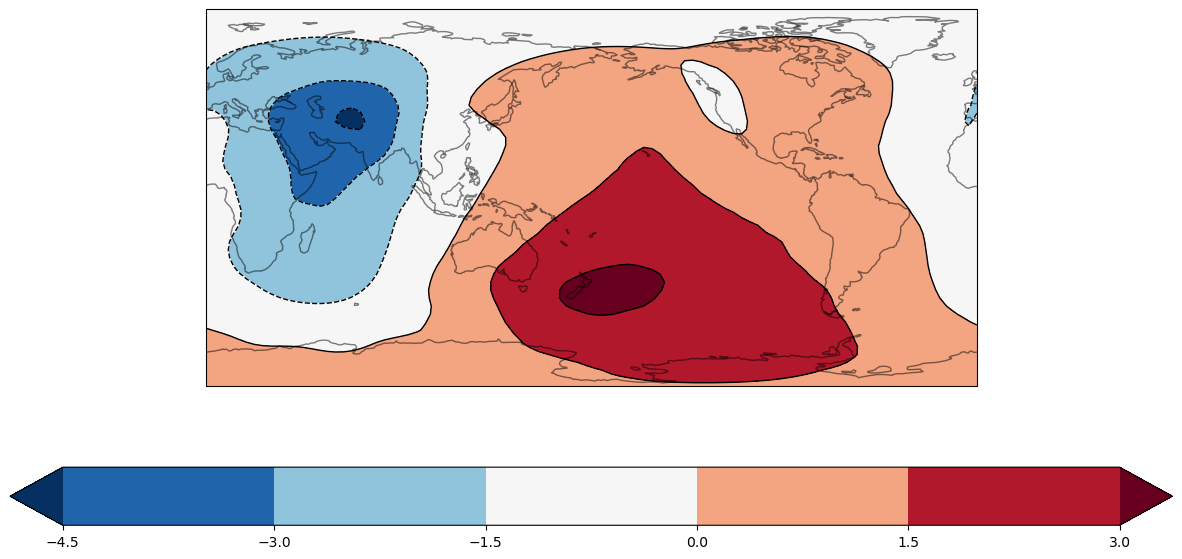

In [12]:
fig, ax = plt.subplots(subplot_kw = dict(projection = proj), figsize = [15,7])

ax.contour(lon,lat,chi200_mean,colors='k',transform=proj0,linewidths=1, extend="both")
c=ax.contourf(lon,lat,chi200_mean,cmap='RdBu_r',transform=proj0, extend="both",)
#ax.contour(lon,lat,fplot2,colors='k',transform=proj0,levels=np.linspace(-150,150,15))
ax.coastlines(color='black', alpha = 0.5)
#ax.quiver(lon[::5], lat[::5], u850[::5,::5], v850[::5,::5], transform = proj0)
fig.colorbar(c,ax=ax,orientation='horizontal')

ax.set_xlim()


(-179.99999999999932, 176.25000000000063)

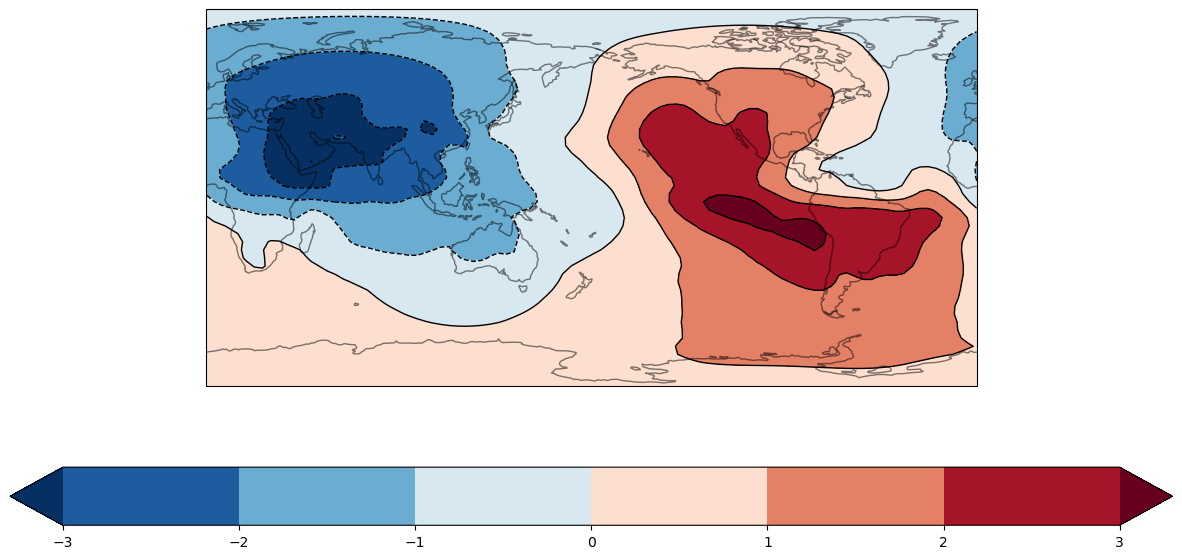

In [13]:
fig, ax = plt.subplots(subplot_kw = dict(projection = proj), figsize = [15,7])

chi_diff850 = chi850_nino - chi850_mean

ax.contour(lon,lat,chi_diff850,colors='k',transform=proj0,linewidths=1, extend="both")
c=ax.contourf(lon,lat,chi_diff850,cmap='RdBu_r',transform=proj0, extend="both",)
#ax.contour(lon,lat,fplot2,colors='k',transform=proj0,levels=np.linspace(-150,150,15))
ax.coastlines(color='black', alpha = 0.5)
#ax.quiver(lon[::5], lat[::5], u850[::5,::5], v850[::5,::5], transform = proj0)
fig.colorbar(c,ax=ax,orientation='horizontal')
#x=[low,loe,loe,low,low]
#y=[las,las,lan,lan,las]
#ax.plot(x,y,transform=proj0,color='red')
ax.set_xlim()
#ax.set_title('T2m (temp0, K, contours) and TP (mm/day) DJF climatology ')
#fig.savefig(seas+'_surface_ut.png',dpi=300)
#plt.show()

(-179.99999999999932, 176.25000000000063)

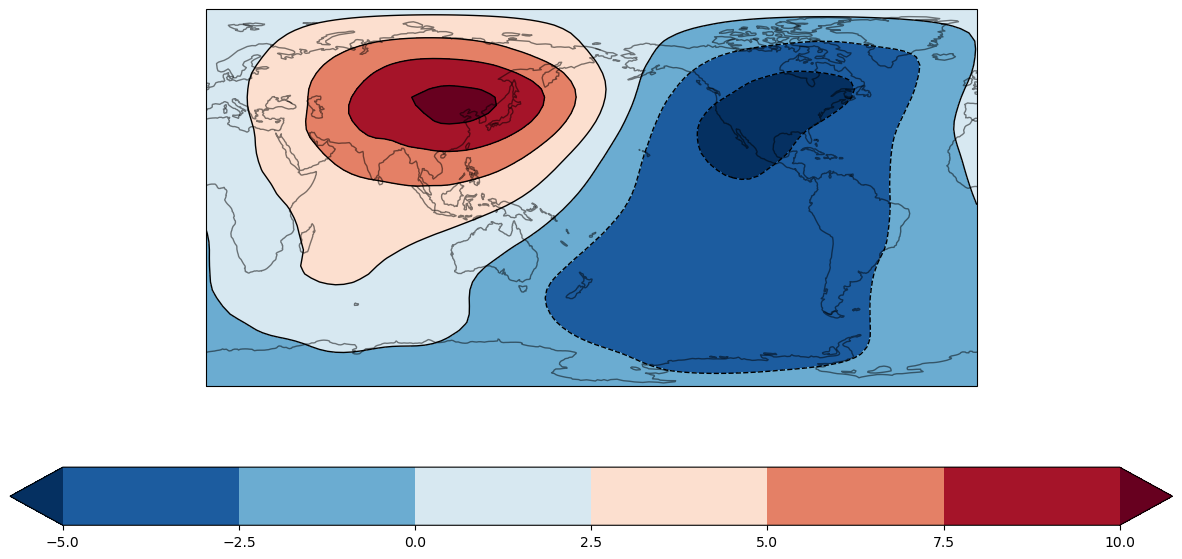

In [14]:
fig, ax = plt.subplots(subplot_kw = dict(projection = proj), figsize = [15,7])

chi_diff200 = chi200_nino - chi200_mean

ax.contour(lon,lat,chi_diff200,colors='k',transform=proj0,linewidths=1, extend="both")
c=ax.contourf(lon,lat,chi_diff200,cmap='RdBu_r',transform=proj0, extend="both",)
#ax.contour(lon,lat,fplot2,colors='k',transform=proj0,levels=np.linspace(-150,150,15))
ax.coastlines(color='black', alpha = 0.5)
#ax.quiver(lon[::5], lat[::5], u850[::5,::5], v850[::5,::5], transform = proj0)
fig.colorbar(c,ax=ax,orientation='horizontal')
#x=[low,loe,loe,low,low]
#y=[las,las,lan,lan,las]
#ax.plot(x,y,transform=proj0,color='red')
ax.set_xlim()
#ax.set_title('T2m (temp0, K, contours) and TP (mm/day) DJF climatology ')
#fig.savefig(seas+'_surface_ut.png',dpi=300)
#plt.show()

In [15]:
seas='JJA'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_clim.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
chisum=ncin.variables['chi'][:]

seas='DJF'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_clim.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
chiwin=ncin.variables['chi'][:]

chi200_sum = chisum[:,3,:,:].mean(axis=0)
chi200_win = chiwin[:,3,:,:].mean(axis=0)

chi925_sum = chisum[:,0,:,:].mean(axis=0)
chi925_win = chiwin[:,0,:,:].mean(axis=0)

u925_win = u[:,0,:,:].mean(axis=0)
v925_win = v[:,0,:,:].mean(axis=0)

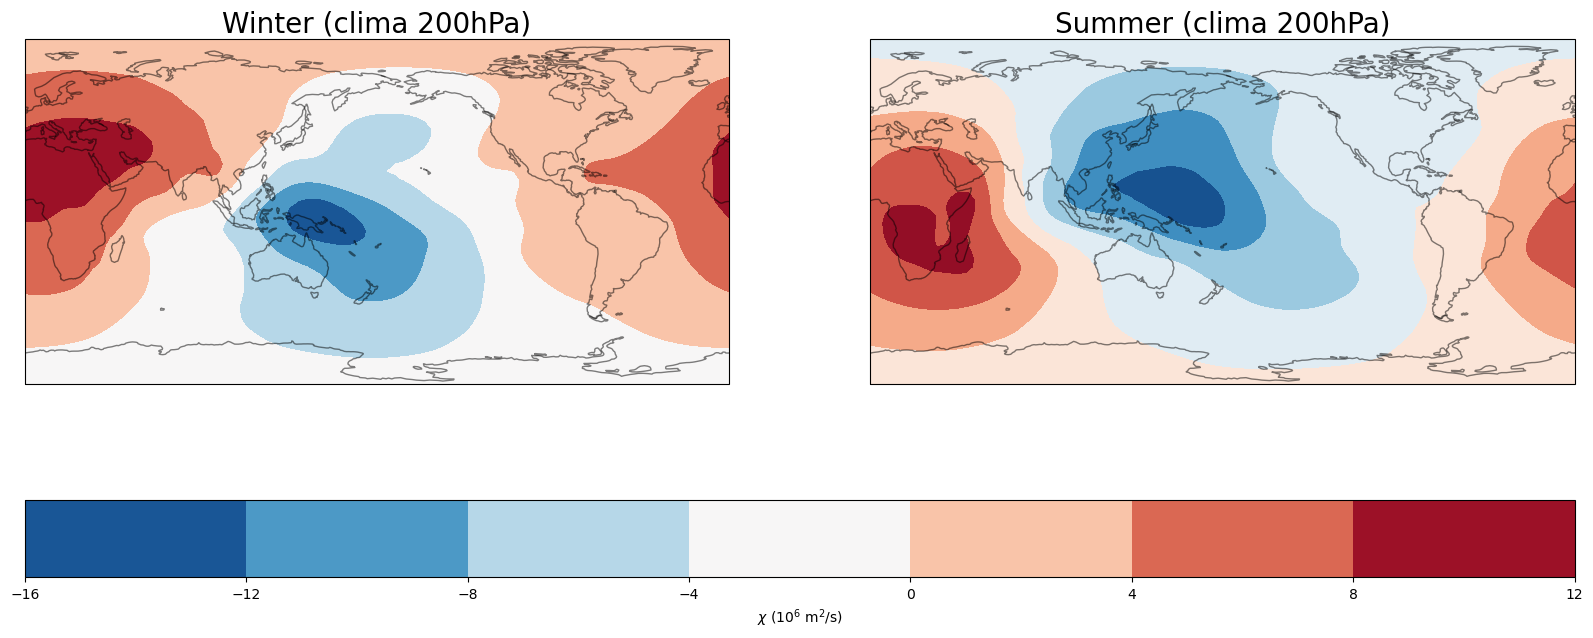

In [16]:
fig, ax = plt.subplots(figsize = [20,10], subplot_kw = dict(projection = proj), ncols = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, chi200_win, cmap = "RdBu_r", transform = proj0)
ax[0].set_title("Winter (clima 200hPa)", fontsize = 20)


ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, chi200_sum, cmap = "RdBu_r", transform = proj0)
ax[1].set_title("Summer (clima 200hPa)", fontsize = 20)

cbar = fig.colorbar(mappable=c, ax = ax[0:2], orientation = "horizontal")
cbar.set_label("$\chi$ (10$^6$ m$^2$/s)")
#fig.tight_layout()

## El senor nino

In [17]:
seas='JJA'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_nino.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
chisum=ncin.variables['chi'][:]

seas='DJF'
DIR='./' #path to directory with NetCDF files 
FILEclim=DIR+seas+'mean_nino.nc' #Full path with file name 

ncin=Dataset(FILEclim,'r')
chiwin=ncin.variables['chi'][:]

chi200n_sum = chisum[:,3,:,:].mean(axis=0)
chi200n_win = chiwin[:,3,:,:].mean(axis=0)

chi925n_sum = chisum[:,0,:,:].mean(axis=0)
chi925n_win = chiwin[:,0,:,:].mean(axis=0)


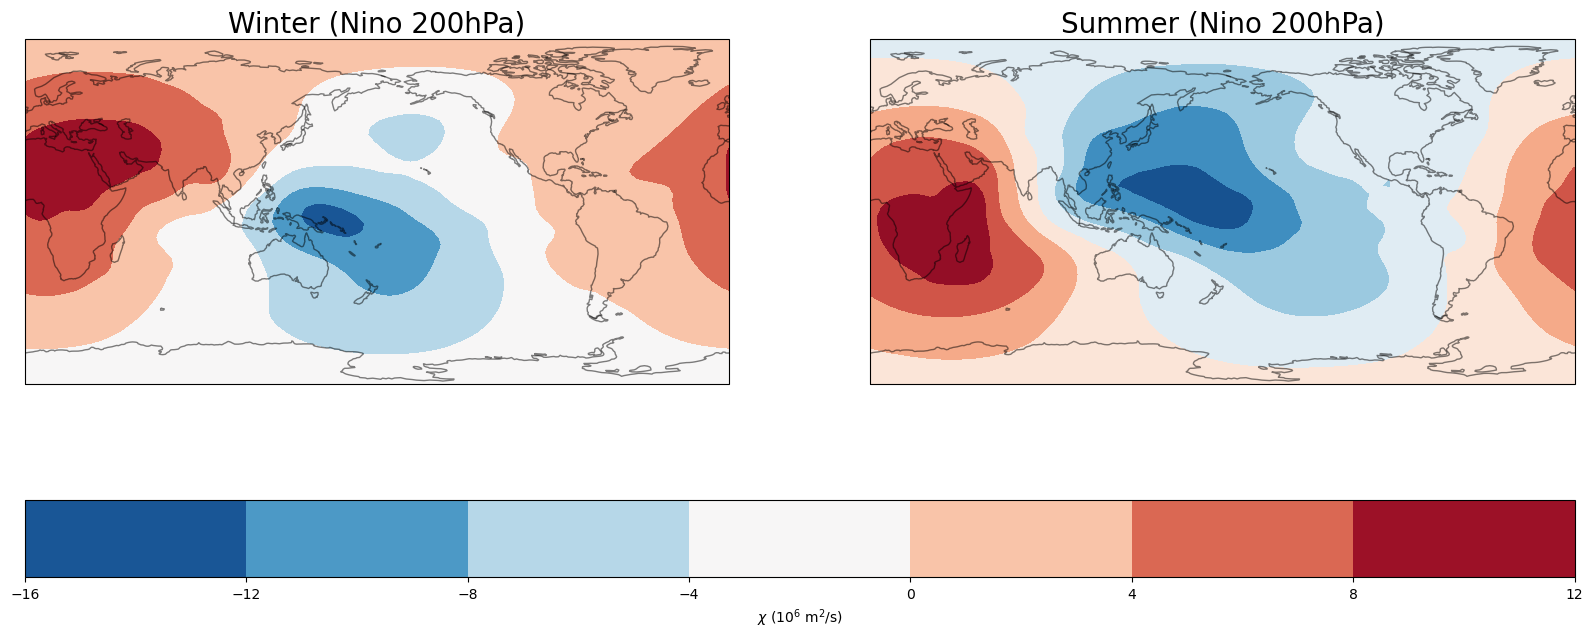

In [18]:
fig, ax = plt.subplots(figsize = [20,10], subplot_kw = dict(projection = proj), ncols = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, chi200n_win, cmap = "RdBu_r", transform = proj0)
ax[0].set_title("Winter (Nino 200hPa)", fontsize = 20)


ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, chi200n_sum, cmap = "RdBu_r", transform = proj0)
ax[1].set_title("Summer (Nino 200hPa)", fontsize = 20)

cbar = fig.colorbar(mappable=c, ax = ax[0:2], orientation = "horizontal")
cbar.set_label("$\chi$ (10$^6$ m$^2$/s)")
#fig.tight_layout()

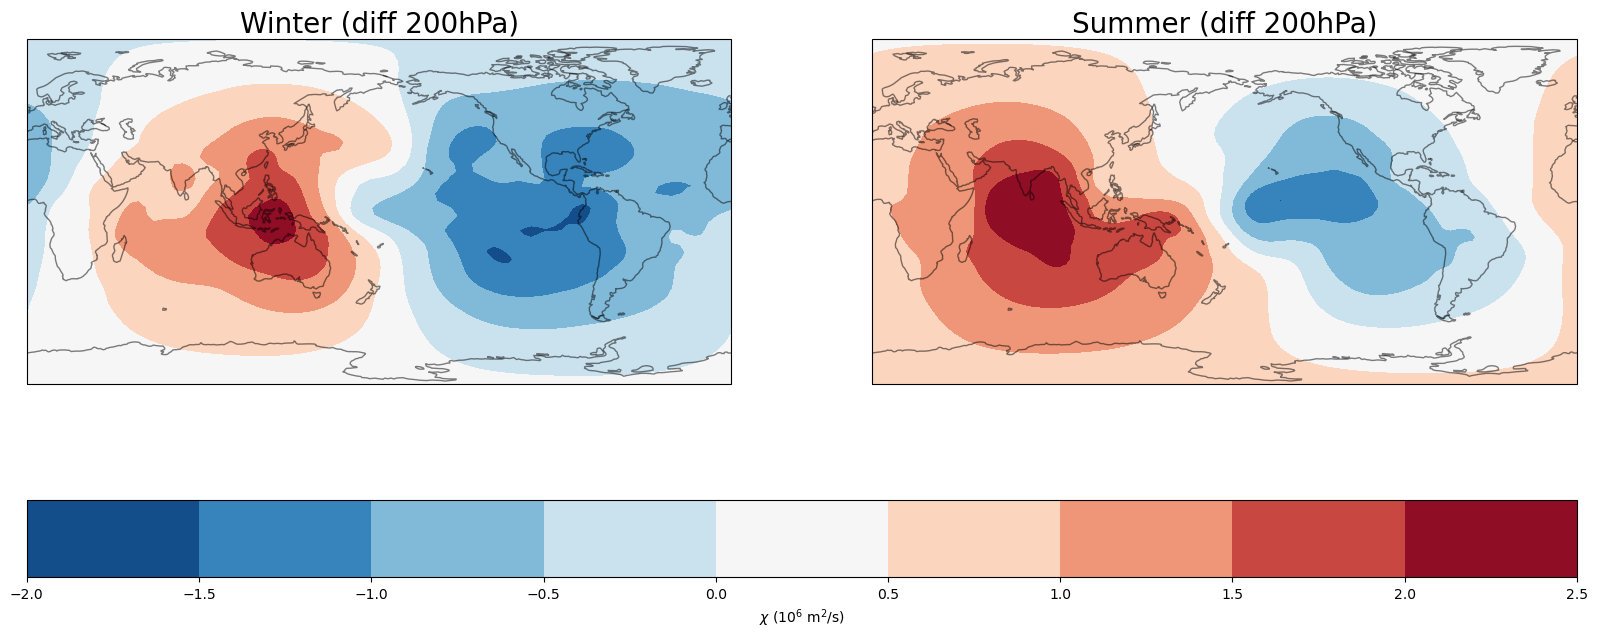

In [19]:
fig, ax = plt.subplots(figsize = [20,10], subplot_kw = dict(projection = proj), ncols = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, chi200n_win - chi200_win, cmap = "RdBu_r", transform = proj0)
ax[0].set_title("Winter (diff 200hPa)", fontsize = 20)


ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, chi200n_sum - chi200_sum, cmap = "RdBu_r", transform = proj0)
ax[1].set_title("Summer (diff 200hPa)", fontsize = 20)

cbar = fig.colorbar(mappable=c, ax = ax[0:2], orientation = "horizontal")
cbar.set_label("$\chi$ (10$^6$ m$^2$/s)")
#fig.tight_layout()

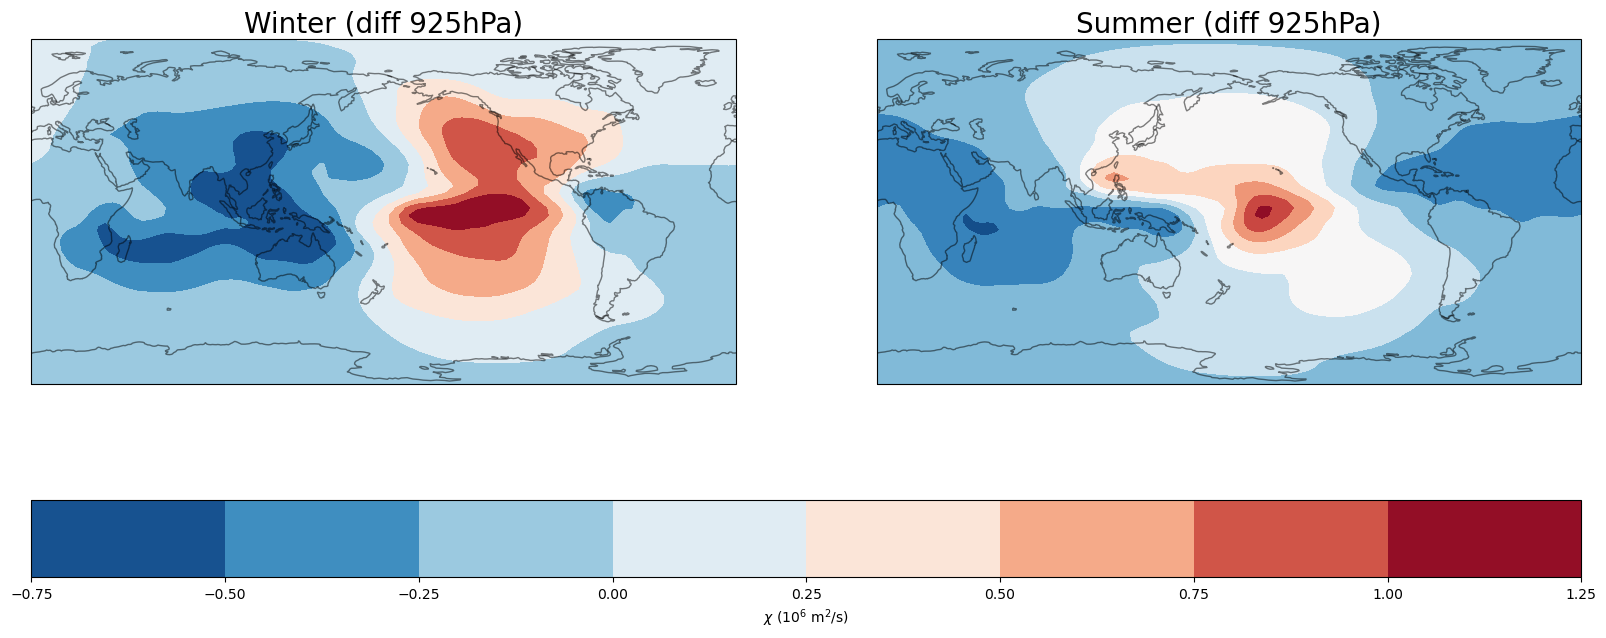

In [20]:
fig, ax = plt.subplots(figsize = [20,10], subplot_kw = dict(projection = proj), ncols = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, chi925n_win - chi925_win, cmap = "RdBu_r", transform = proj0)
ax[0].set_title("Winter (diff 925hPa)", fontsize = 20)


ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, chi925n_sum - chi925_sum, cmap = "RdBu_r", transform = proj0)
ax[1].set_title("Summer (diff 925hPa)", fontsize = 20)

cbar = fig.colorbar(mappable=c, ax = ax[0:2], orientation = "horizontal")
cbar.set_label("$\chi$ (10$^6$ m$^2$/s)")
#fig.tight_layout()

## IMMAGINI UFFICIALI DA QUI

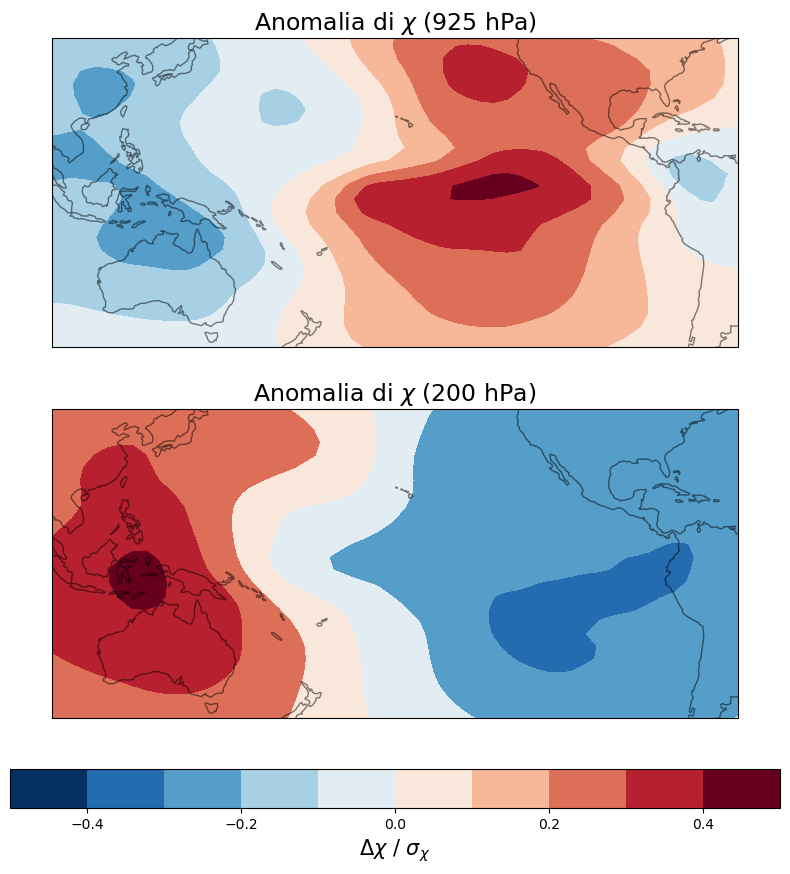

In [21]:
fig, ax = plt.subplots(figsize = [17,10], subplot_kw = dict(projection = proj), nrows = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

las,lan=-80,120
low,loe=-45,45

cmap = get_cmap("RdBu_r", 10)

norm = Normalize(vmin = -0.5, vmax = 0.5)
ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, (chi925n_win - chi925_win)/np.std(chi925_win), 
                   cmap = cmap, transform = proj0, norm = norm)
ax[0].set_title("Anomalia di $\chi$ (925 hPa)", fontsize = 17)
ax[0].set_xlim(las,lan)
ax[0].set_ylim(low,loe)

ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, (chi200n_win - chi200_win)/np.std(chi200_win), 
               cmap = cmap, transform = proj0, norm = norm)
ax[1].set_title("Anomalia di $\chi$ (200 hPa)", fontsize = 17)
ax[1].set_xlim(las,lan)
ax[1].set_ylim(low,loe)

cbar = fig.colorbar(mappable=ScalarMappable(cmap = cmap, norm = norm), ax = ax[0:2], orientation = "horizontal", fraction = 0.05)
cbar.set_label("$\Delta\chi$ / $\sigma_{\chi}$", fontsize = 15)
cbar.ax.tick_params(labelsize = 10)

fig.subplots_adjust(bottom = 0.2)
fig.savefig("differenze_quote.pdf", bbox_inches = "tight")

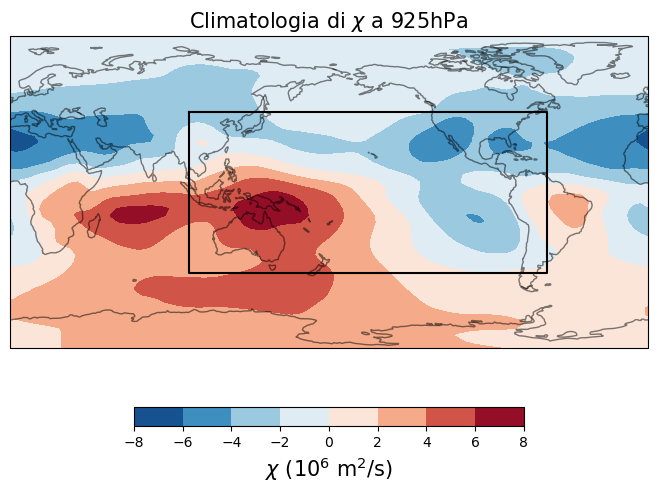

In [22]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize = [10,5], subplot_kw = dict(projection = proj))
ax.coastlines(color = "black", alpha = 0.5)



las,lan=120,-80
low,loe=45,-45
y=[low,loe,loe,low,low]
x=[lan,lan,las,las,lan]

c = ax.contourf(lon, lat, chi925_win, cmap = "RdBu_r", transform = proj0)
ax.set_title("Climatologia di $\chi$ a 925hPa", fontsize = 15)

ax.plot(x,y,transform=proj,color='black')
cbar = fig.colorbar(mappable=c, ax = ax, orientation = "horizontal", fraction = 0.05)

cbar.set_label("$\chi$ (10$^6$ m$^2$/s)", fontsize = 15)
cbar.ax.tick_params(labelsize = 10)

fig.subplots_adjust(bottom = 0.10)

fig.savefig("clima_925.pdf", bbox_inches = "tight")

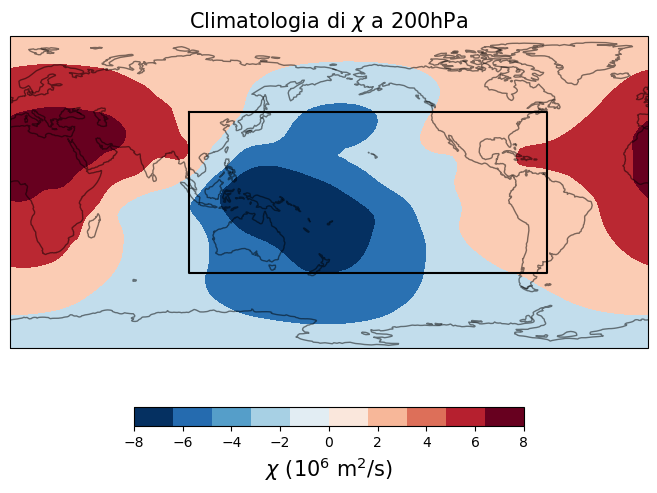

In [25]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize = [10,5], subplot_kw = dict(projection = proj))
ax.coastlines(color = "black", alpha = 0.5)

norm = Normalize(-8,8)

las,lan=120,-80
low,loe=45,-45
y=[low,loe,loe,low,low]
x=[lan,lan,las,las,lan]

c = ax.contourf(lon, lat, chi200_win, cmap = "RdBu_r", transform = proj0, norm = norm)
ax.set_title("Climatologia di $\chi$ a 200hPa", fontsize = 15)

ax.plot(x,y,transform=proj,color='black')
cbar = fig.colorbar(mappable=ScalarMappable(cmap = cmap, norm = norm), ax = ax, orientation = "horizontal", fraction = 0.05)

cbar.set_label("$\chi$ (10$^6$ m$^2$/s)", fontsize = 15)
cbar.ax.tick_params(labelsize = 10)

fig.subplots_adjust(bottom = 0.10)

fig.savefig("clima_200.pdf", bbox_inches = "tight")

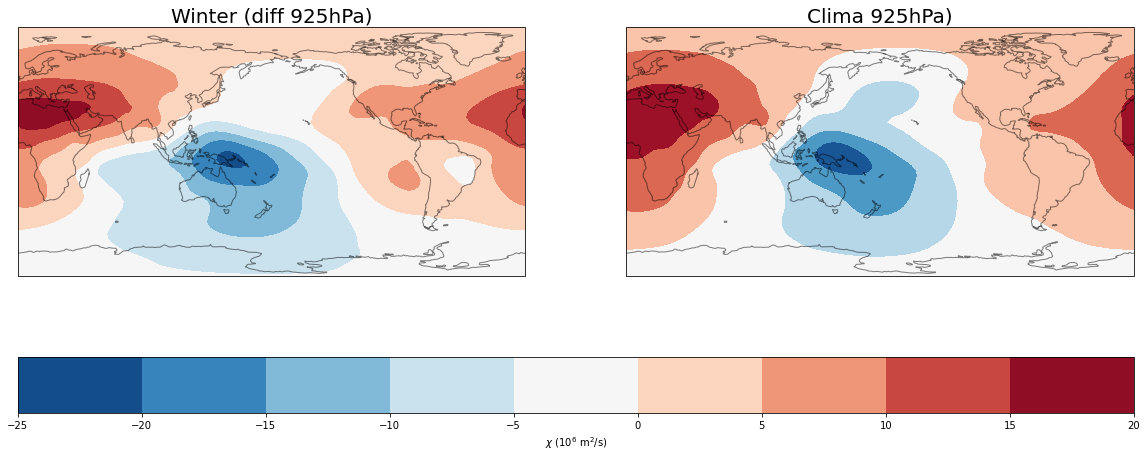

In [37]:
fig, ax = plt.subplots(figsize = [20,10], subplot_kw = dict(projection = proj), ncols = 2)
#fig.suptitle("$\chi$ a 200 hPa (climatologia)")

ax[0].coastlines(color = "black", alpha = 0.5)
c = ax[0].contourf(lon, lat, chi200_win - chi925_win, cmap = "RdBu_r", transform = proj0)
ax[0].set_title("Winter (diff 925hPa)", fontsize = 20)


ax[1].coastlines(color = "black", alpha = 0.5)
ax[1].contourf(lon, lat, chi200_win, cmap = "RdBu_r", transform = proj0)
ax[1].set_title("Clima 925hPa)", fontsize = 20)

cbar = fig.colorbar(mappable=c, ax = ax[0:2], orientation = "horizontal")
cbar.set_label("$\chi$ (10$^6$ m$^2$/s)")
#fig.tight_layout()